## Moreno Puente Emilia Cristina

## Tarea9

--------------------------

1._

    a)

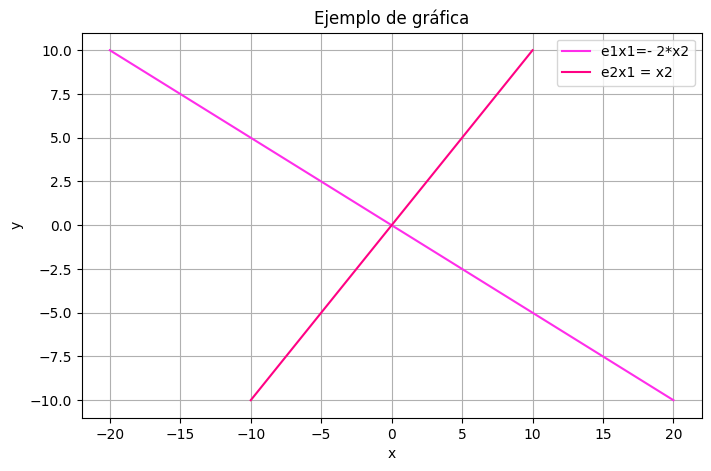

In [10]:
import matplotlib.pyplot as plt
import numpy as np


x2 = np.linspace(-10, 10, 100)
x1e1= - 2* x2
x1e2=  x2

plt.figure(figsize=(8, 5))
plt.plot(x1e1, x2,color="#FF2DEA", label='e1x1=- 2*x2')
plt.plot(x1e2, x2, color="#FF0184", label='e2x1 = x2')
plt.title('Ejemplo de gráfica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Si tienen una interseccion en un solo punto en este caso en el punto (0,0) entonces es un sistema de ecuaciones de solución única

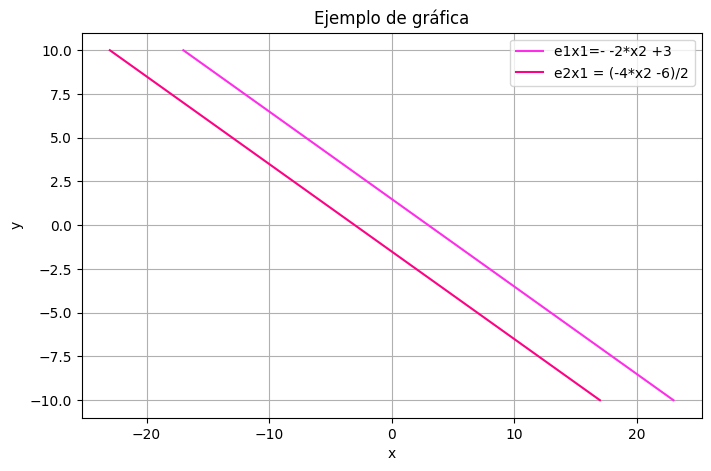

In [12]:
import matplotlib.pyplot as plt
import numpy as np


x2 = np.linspace(-10, 10, 100)
x1e1= 3 - 2* x2
x1e2=  (-4*x2 -6)/2

plt.figure(figsize=(8, 5))
plt.plot(x1e1, x2,color="#FF2DEA", label='e1x1=- -2*x2 +3')
plt.plot(x1e2, x2, color="#FF0184", label='e2x1 = (-4*x2 -6)/2')
plt.title('Ejemplo de gráfica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Al ser dos lineas paralelas nunca se van intersecar por lo tanto es un sistema sin solución

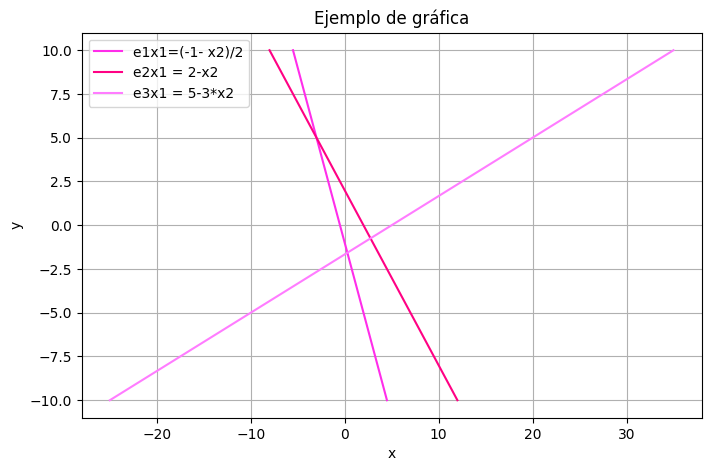

In [19]:
import matplotlib.pyplot as plt
import numpy as np


x2 = np.linspace(-10, 10, 100)
x1e1= (-1- x2)/2
x1e2=  2-x2
x1e3=  5+3*x2



plt.figure(figsize=(8, 5))
plt.plot(x1e1, x2,color="#FF2DEA", label='e1x1=(-1- x2)/2')
plt.plot(x1e2, x2, color="#FF0184", label='e2x1 = 2-x2')
plt.plot(x1e3, x2, color="#FF7CFF", label='e3x1 = 5-3*x2')
plt.title('Ejemplo de gráfica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

No existe un punto en el que las tres funciones itersecan por lo que el sistema no tiene solución,

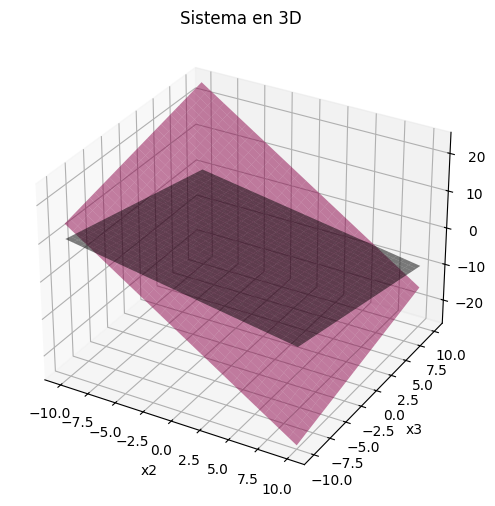

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x2, x3 = np.meshgrid(
    np.linspace(-10,10,30),
    np.linspace(-10,10,30)
)

x1e1 = (1 - x2 - x3) / 2
x1e2 = (-1 + x3 - 4*x2) / 2

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x2, x3, x1e1, alpha=0.5, color="#000000")
ax.plot_surface(x2, x3, x1e2, alpha=0.5, color='#FF0184'    )

ax.set_xlabel('x2')
ax.set_ylabel('x3')
ax.set_zlabel('x1')
plt.title('Sistema en 3D')
plt.show()


In [9]:
import numpy as np
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

def r(x):
    return np.round(x, 2)

def eliminacion_gaussiana(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = r( A[j, i] / A[i, i])
            A[j, i:] = r(A[j, i:] - r(m * A[i, i:]))

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] =r( A[n - 1, n] / A[n - 1, n - 1])

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += r(A[i, j] * solucion[j])
        solucion[i] = r((A[i, n] - suma) / A[i, i])

    return solucion


Ab = [
    [1., 4, 1, 8],
    [5/3, 2/3, 2/3, 1],
    [2, 1, 4, 11]
]



eliminacion_gaussiana(Ab)

[12-28 23:02:30][INFO] 2025-12-28 23:02:30.844491
[12-28 23:02:30][INFO] 
[[  1.     4.     1.     8.  ]
 [ -0.    -6.01  -1.   -12.36]
 [  0.    -7.     2.    -5.  ]]
[12-28 23:02:30][INFO] 
[[  1.     4.     1.     8.  ]
 [ -0.    -6.01  -1.   -12.36]
 [  0.    -0.03   3.16   9.34]]


array([-1.2 ,  1.56,  2.96])

In [10]:
Ab = [
    [4., 2, -1, -5],
    [1/9, 1/9, -1/3, -1],
    [1, 4, 2, 9]
]



eliminacion_gaussiana(Ab)

[12-28 23:04:53][INFO] 
[[ 0.11111111  0.11111111 -0.33333333 -1.        ]
 [ 0.         -2.         11.         31.        ]
 [ 0.          3.          5.         18.        ]]
[12-28 23:04:53][INFO] 
[[ 0.11111111  0.11111111 -0.33333333 -1.        ]
 [ 0.         -2.         11.         31.        ]
 [ 0.          0.         21.5        64.5       ]]


array([-0.99,  1.  ,  3.  ])

In [ ]:
import numpy as np
import logging
from sys import stdout
from datetime import datetime

intercambio=0 
logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

def eliminacion_gaussiana(A: np.ndarray | list[list[float | int]]) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux
            global intercambio
            intercambio+=1

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

    print("Número de intercambios de filas:", intercambio)
    return solucion


Ab = [[1., -1, 3,2], [3, -3, 1, -1], [1,1, 0, 3]]

eliminacion_gaussiana(Ab)



[12-28 23:14:02][INFO] 2025-12-28 23:14:02.438091
[12-28 23:14:02][INFO] 
[[ 1. -1.  3.  2.]
 [ 0.  0. -8. -7.]
 [ 0.  2. -3.  1.]]
[12-28 23:14:02][INFO] 
[[ 1. -1.  3.  2.]
 [ 0.  2. -3.  1.]
 [ 0.  0. -8. -7.]]
Número de intercambios de filas: 1
Número de intercambios de filas: 1


In [18]:
Ab = [[2., -1/5, 3,1], [-1,0 , 2, 3], [4,-4.5, +5, 1]]

eliminacion_gaussiana(Ab)

[12-28 23:15:08][INFO] 
[[-1.   0.   2.   3. ]
 [ 0.  -0.2  7.   7. ]
 [ 0.  -4.5 13.  13. ]]
[12-28 23:15:08][INFO] 
[[  -1.     0.     2.     3. ]
 [   0.    -0.2    7.     7. ]
 [   0.     0.  -144.5 -144.5]]
Número de intercambios de filas: 2


array([-1., -0.,  1.])

In [19]:
Ab = [[2., 0, 0,0,3], [1, 1.5, 0, 0,4.5], [0,-3, 0.5, 0,-6.6] ,[2,-2,1,1,0.8]]

eliminacion_gaussiana(Ab)

[12-28 23:17:16][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 0.  -5.   1.   1.  -8.2]]
[12-28 23:17:16][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.   0.   0.5  0.  -0.6]
 [ 0.   0.   1.   1.   1.8]]
[12-28 23:17:16][INFO] 
[[ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.   0.  -6. ]
 [ 0.   0.   0.5  0.  -0.6]
 [ 0.   0.   0.   1.   3. ]]
Número de intercambios de filas: 3


array([ 1.5,  2. , -1.2,  3. ])

In [20]:
Ab = [[1., 1, 0,1,2], [2, 1, -1, 1,1 ], [4,-1, -2, 2,0] ,[3,-1,-1,2,-3]]

eliminacion_gaussiana(Ab)

[12-28 23:19:55][INFO] 
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0. -5. -2. -2. -8.]
 [ 0. -4. -1. -1. -9.]]
[12-28 23:19:55][INFO] 
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0.  0.  3.  3.  7.]
 [ 0.  0.  3.  3.  3.]]
[12-28 23:19:55][INFO] 
[[ 1.  1.  0.  1.  2.]
 [ 0. -1. -1. -1. -3.]
 [ 0.  0.  3.  3.  7.]
 [ 0.  0.  0.  0. -4.]]


ValueError: No existe solución única.